# Nouveaux histogrammes

In [4]:
from os import listdir
from os.path import isfile, join
import os
import pylab
import pandas as pd
import seaborn as sn
import time
import scipy
import h5py
import numpy as np
import random
import matplotlib.pyplot as plt 
#from plyfile import PlyData, PlyElement

In [5]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics.pairwise import euclidean_distances

In [21]:
dossier_dgcnn = "output_dgcnn_new"
dossier_shellnet = "output_shellnet_new"
dossier_pcnn = "output_pcnn_new"
dossier_pointcnn = "output_pointcnn_new"

#### dict des pred par réseau #####
dict_shellnet = dict()
dict_pointcnn = dict()
dict_dgcnn = dict()
dict_pcnn = dict()

#### dict des acc par réseau ####
dict_acc_shellnet = dict()
dict_acc_pointcnn = dict()
dict_acc_dgcnn = dict()
dict_acc_pcnn = dict()

#### dict du nb d'acq par réseau ####
dict_nb_acq = dict()

classes = ["2","5","6","8","10","13", "14","17","20","21","23","32","33","45","49","50","51","52","55","60"]
for curr_classe in classes :
    current_classe = "Classe" + curr_classe

    filename = "classe"+curr_classe+"_"

    #prediction shellnet
    data_shellnet = h5py.File(dossier_shellnet +"/" + filename+"shellnet.h5")
    pred_shellnet   = data_shellnet['pred']

    #prediction pointcnn
    data_pointcnn = h5py.File(dossier_pointcnn +"/" + filename+"test.h5")
    pred_pointcnn   = data_pointcnn['pred']

    #prediction dgcnn
    data_dgcnn = h5py.File(dossier_dgcnn +"/" + filename+"test.h5")
    pred_dgcnn   = data_dgcnn['pred']

    #prediction pcnn
    data_pcnn = h5py.File(dossier_pcnn +"/" + filename+"test.h5")
    pred_pcnn   = data_pcnn['pred']

    dict_shellnet[curr_classe] = []
    dict_pointcnn[curr_classe] = []
    dict_dgcnn[curr_classe] = []
    dict_pcnn[curr_classe] = []

    for index in range(len(pred_shellnet)):
            dict_shellnet[curr_classe].append(int(pred_shellnet[index]))
            dict_pointcnn[curr_classe].append(int(pred_pointcnn[index]))
            dict_dgcnn[curr_classe].append(int(pred_dgcnn[index]))
            dict_pcnn[curr_classe].append(int(pred_pcnn[index]))
                

    nb_acq = len(dict_shellnet[curr_classe])
    label = np.ones((nb_acq))*int(curr_classe)
    
    #MAJ accuracy
    
    dict_acc_shellnet[curr_classe] = accuracy_score(label,dict_shellnet[curr_classe])
    dict_acc_pointcnn[curr_classe] = accuracy_score(label,dict_pointcnn[curr_classe])
    dict_acc_dgcnn[curr_classe] = accuracy_score(label,dict_dgcnn[curr_classe])
    dict_acc_pcnn[curr_classe] = accuracy_score(label,dict_pcnn[curr_classe])
    
    #MAJ nb_acq
    
    dict_nb_acq[curr_classe] = len(dict_shellnet[curr_classe])

In [22]:
def all_statistics(dict_acc_shellnet,dict_acc_pointcnn,dict_acc_dgcnn,dict_acc_pcnn):

    accuracy = []
    for curr_classe in classes:
        #print(curr_classe)
        accuracy.append(dict_acc_shellnet[curr_classe])
        accuracy.append(dict_acc_pointcnn[curr_classe])
        accuracy.append(dict_acc_dgcnn[curr_classe])
        accuracy.append(dict_acc_pcnn[curr_classe])
        
    return accuracy

In [23]:
all_statistics(dict_acc_shellnet,dict_acc_pointcnn,dict_acc_dgcnn,dict_acc_pcnn)

[0.5454545454545454,
 0.8181818181818182,
 0.9090909090909091,
 0.45454545454545453,
 0.75,
 1.0,
 0.75,
 1.0,
 0.5,
 0.9,
 0.1,
 0.9,
 0.375,
 0.8125,
 0.625,
 0.75,
 1.0,
 1.0,
 0.8888888888888888,
 0.7777777777777778,
 0.0,
 1.0,
 0.4444444444444444,
 0.5555555555555556,
 1.0,
 1.0,
 0.7619047619047619,
 0.6031746031746031,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 0.5833333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9310344827586207,
 0.8160919540229885,
 0.6666666666666666,
 1.0,
 0.9333333333333333,
 0.7333333333333333,
 0.96,
 1.0,
 1.0,
 0.84,
 0.9642857142857143,
 0.9821428571428571,
 0.8035714285714286,
 0.5892857142857143,
 1.0,
 0.8461538461538461,
 0.23076923076923078,
 0.3076923076923077,
 1.0,
 0.9540229885057471,
 0.4482758620689655,
 0.6091954022988506,
 0.9866666666666667,
 0.9866666666666667,
 0.9466666666666667,
 0.8,
 0.9565217391304348,
 0.9130434782608695,
 0.9565217391304348,
 0.9565217391304348,
 1.0,
 0.8888888888888888,
 0.2222222222222222,
 0.55

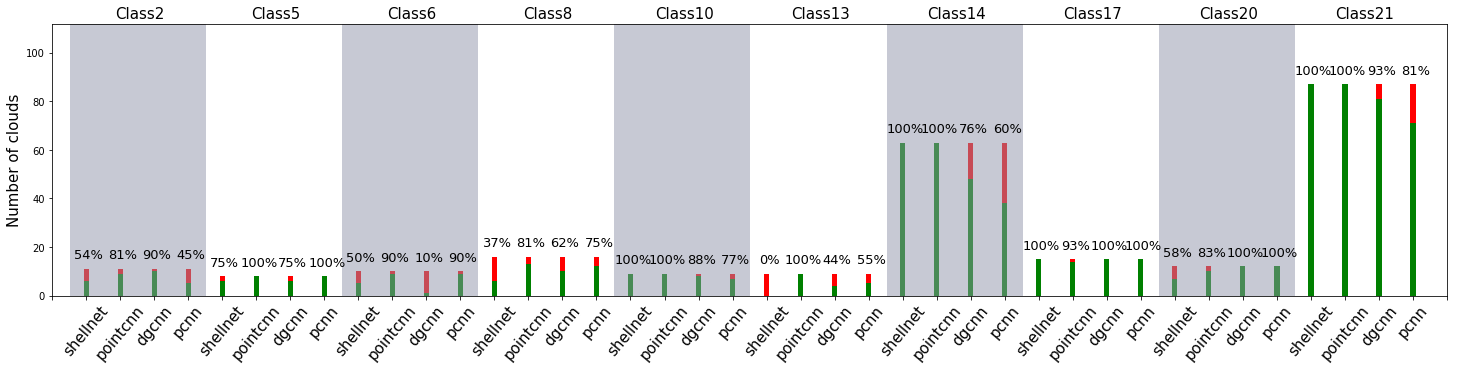

In [24]:
fig = plt.figure(2,figsize=[25, 5])
x = range(0,10*4+2)
nb_acquisitions = []
class_order = []
for curr_classe in classes:
    classe = "Class"+curr_classe
    class_order.append(classe)
    for i in range(4):
        nb_acquisitions.append(dict_nb_acq[curr_classe])

accuracy = all_statistics(dict_acc_shellnet,dict_acc_pointcnn,dict_acc_dgcnn,dict_acc_pcnn)[:40]        
height = [0] + nb_acquisitions[:40] + [0]
width = 0.15
grad_x = [i+width/2.0 for i in x]
grad_y = height
#print("len grad_x : ", len(grad_x))
#print("len grad_y : ", len(grad_y))
plt.scatter(grad_x,grad_y,color='w',s=40)
#plt.axvspan(grad_x[0], grad_x[1], facecolor='#9095ab', alpha=0.5)
for i in range(len(grad_x)-2):
    plt.annotate(str(int(accuracy[i]*100))+"%", # this is the text
                     (grad_x[i+1],grad_y[i+1]), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',fontsize=13)
#print(np.array(accuracy)*np.array(nb_acquisitions))
height_true = [0]+[int(accuracy[i]*nb_acquisitions[i]) for i in range(len(accuracy))]+[0]
#print(height_true)
noms_modeles = ["shellnet", "pointcnn", "dgcnn", "pcnn"] 
BarName = [" "] + noms_modeles*10 + [" "]

plt.bar(x, height, width, color="red" )
plt.bar(x, height_true, width, color="green" )
#plt.scatter([i+width/2.0 for i in x],height,color='k',s=40)

plt.xlim(0,12)
plt.ylim(0,112)


plt.ylabel('Number of clouds',fontsize=15)
#plt.title('Diagram ALL')

pylab.xticks(x, BarName, rotation=50,fontsize=15)

for i in range(0,len(grad_x)-4,8):
    plt.axvspan(grad_x[i]+3*width, grad_x[i+4]+3*width, facecolor='#9095ab', alpha=0.5)
cpt = 0   
for i in range(0,len(grad_x)-2,4):
    plt.annotate(class_order[cpt], # this is the text
                     (grad_x[i+1]+1.5,110), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',fontsize=15)
    cpt +=1
#plt.savefig('SimpleBar.png')
plt.show()

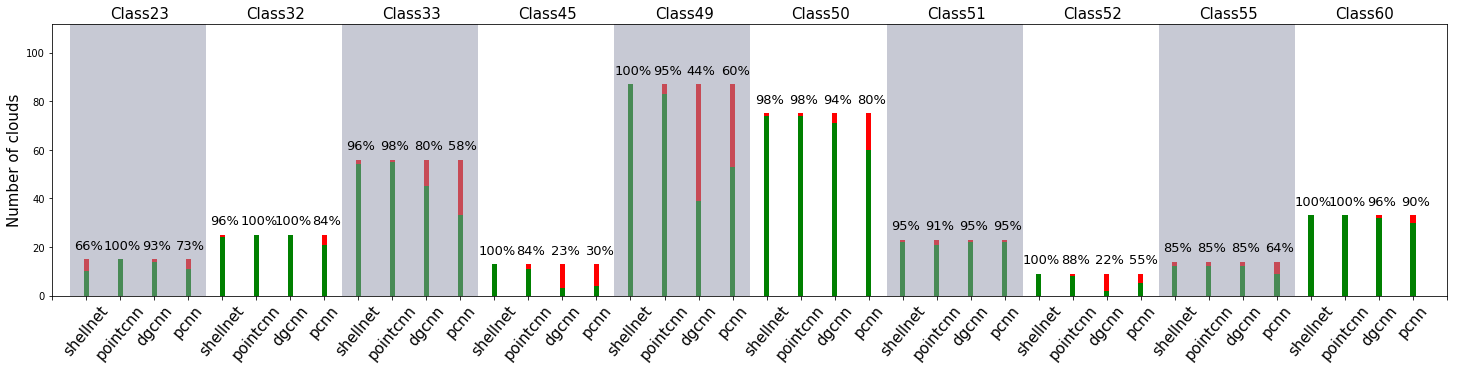

In [25]:
fig = plt.figure(3,figsize=[25, 5])
x = range(0,10*4+2)

accuracy = all_statistics(dict_acc_shellnet,dict_acc_pointcnn,dict_acc_dgcnn,dict_acc_pcnn)[40:]
#print(accuracy)
height = [0] + nb_acquisitions[40:] + [0]
width = 0.15
grad_x = [i+width/2.0 for i in x]
grad_y = height
#print("len grad_x : ", len(grad_x))
#print("len grad_y : ", len(grad_y))
plt.scatter(grad_x,grad_y,color='w',s=40)
#plt.axvspan(grad_x[0], grad_x[1], facecolor='#9095ab', alpha=0.5)
for i in range(len(grad_x)-2):
    plt.annotate(str(int(accuracy[i]*100))+"%", # this is the text
                     (grad_x[i+1],grad_y[i+1]), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',fontsize=13)
#print(np.array(accuracy)*np.array(nb_acquisitions))
height_true = [0]+[int(accuracy[i]*nb_acquisitions[i+40]) for i in range(len(accuracy))]+[0]

#print(height_true)
noms_modeles = ["shellnet", "pointcnn", "dgcnn", "pcnn"] 
BarName = [" "] + noms_modeles*10 + [" "]

plt.bar(x, height, width, color="red" )
plt.bar(x, height_true, width, color="green" )
#plt.scatter([i+width/2.0 for i in x],height,color='k',s=40)

plt.xlim(0,12)
plt.ylim(0,112)


plt.ylabel('Number of clouds',fontsize=15)
#plt.title('Diagram ALL')

pylab.xticks(x, BarName, rotation=50, fontsize=15)
for i in range(0,len(grad_x)-4,8):
    plt.axvspan(grad_x[i]+3*width, grad_x[i+4]+3*width, facecolor='#9095ab', alpha=0.5)
cpt = 0   
for i in range(0,len(grad_x)-2,4):
    plt.annotate(class_order[10+cpt], # this is the text
                     (grad_x[i+1]+1.5,110), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center', fontsize=15)
    cpt +=1
#plt.savefig('SimpleBar.png')
plt.show()